<a href="https://colab.research.google.com/github/irwanmaryam/image-classification/blob/main/face_detection_using_mediapipe_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

     |████████████████████████████████| 37.7MB 81kB/s 


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
%cd "/content"/"gdrive"/"MyDrive"/"Image Classification"

!ls

/content/gdrive/.shortcut-targets-by-id/1cVeVTbb04zu3GiUyf_ANAYTACMMbG5Wy/Image Classification
 baby1.jpg
'face detection 60 fps using media pipe.ipynb'
'face recognition using face recognition library.ipynb'
'Image Preprocessing fundamental.ipynb'


In [11]:
import cv2 as cv
import mediapipe as mp
import time
import matplotlib.pyplot as plt




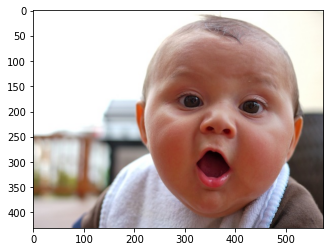

In [12]:
img = cv.imread('baby1.jpg')
timing = 0

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [14]:
mpFaceDetection = mp.solutions.face_detection
draw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection(0.75)

result = faceDetection.process(img)

In [15]:
print(result)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


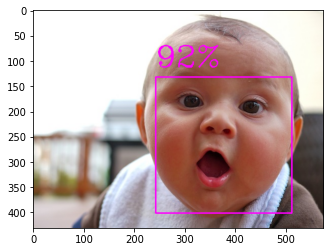

In [22]:
if result.detections:
  for id, detection in enumerate(result.detections):

    bboxC = detection.location_data.relative_bounding_box
    imgh, imgw, imgc = img.shape
    bbox = int(bboxC.xmin * imgw), int(bboxC.ymin * imgh), \
                   int(bboxC.width * imgw), int(bboxC.height * imgh)

    cv.rectangle(img, bbox, (255, 0, 255), 2)
    cv.putText(img, f'{int(detection.score[0] * 100)}%',
               (bbox[0], bbox[1] - 20), cv.FONT_HERSHEY_COMPLEX, 2, (255, 0, 255)
                ,2)
    
plt.imshow(img)